In [69]:
import sys
sys.executable

'/Users/gaozhiyong/Documents/pyenv/pyenv3.6/bin/python'

In [70]:
import pandas as pd
import jieba
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = pd.read_csv("微博新闻数据集.csv")

In [72]:
data

,id,content,picture_lists,category,ncw_label,fake_label,real_label,comment_2c,comment_all
0,4028762460708675,回复新浪网友对博文【国家文物局限制鉴宝节目现场估价转】的评论：;;查看原文：,NaN,文体娱乐,0,0,1,NaN,NaN
1,4126670854660291,//分享网易新闻:《发生在昆明的火锅店老板“辱滇门”，云南人该愤怒还是羞愧》|发生在昆明.....,63ad082a189566eed7c4bb3e4bc55012.jpg,社会生活,0,0,1,NaN,NaN
2,3702441948299962,西宁城管围殴民警扬言要把警察打死|西宁城管围...,4986dc2a5f09a87c7af5dfc57d7775cd.jpg,社会生活,0,0,1,NaN,NaN
3,4239549419245466,【川航航班因驾驶舱风挡破裂安全备降成都】今天上午6:26从重庆江北国际机场出发前往拉萨的四川...,dcfccfc69e90a0007afd6aafa1385e56.jpg,社会生活,0,0,1,NaN,NaN
4,3966337217183260,支持郑强！！！//【贵州大学校长回应空姐言论:常给她们写感谢信】,NaN,社会生活,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
49905,4281576541648565,\t\t奇妙的食光声明 网传的奇妙的食光澳洲冲突事件告一段落！庭审结果没有罚款没有赔偿没有逮...,1599889a0b2357a4e1464b532a046f58.jpg\t3d20edbf...,文体娱乐,1,0,0,哪个台的\t不评论打人行为的话，那私生本身就很可怕\t,哪个台的\t不评论打人行为的话，那私生本身就很可怕\t代拍卖图随随便便大把钱，跟车别车、无视...
49906,4300177235889695,#请陈立农工作室立刻停止不合理商业合作# 望贵公司可以好好规划艺人的发展，宁缺毋滥，这次的事...,d9904fccbc04bee388a92786a379c197.jpg,文体娱乐,1,0,0,请正面回应\t不支持！@陳立農工作室[微笑][微笑]1\t,请正面回应\t不支持！@陳立農工作室[微笑][微笑]1\t我真是气到死！\t来，我们谈谈人生...
49907,4301684919880140,很多未成年少女被侵犯恰恰是那些熟悉的人，意想不到的。《高铁事件到底是不是猥亵？多位专家给了说...,651303513fd7e8487163d9ace9757d9c.jpg,社会生活,1,0,0,NaN,NaN
49908,4302998223949938,#官方回应车轮带泥被罚#这一案例，就像发生在浙江省金华市多湖派出所丢失警犬处理一案那样，是警...,5df69b4bb412a48f4055c4d9e6a3d85e.jpg\t0b52423e...,社会生活,1,0,0,小散们最无助的时候，只有@股市抄盘能带你们起飞。今天又板了2支\t希望能改进服务态度。\t,小散们最无助的时候，只有@股市抄盘能带你们起飞。今天又板了2支\t希望能改进服务态度。\t扬...


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49910 entries, 0 to 49909
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             49910 non-null  object
 1   content        49910 non-null  object
 2   picture_lists  29625 non-null  object
 3   category       49910 non-null  object
 4   ncw_label      49910 non-null  int64 
 5   fake_label     49910 non-null  int64 
 6   real_label     49910 non-null  int64 
 7   comment_2c     22689 non-null  object
 8   comment_all    22689 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.4+ MB


In [74]:
for i in data[:3]['content']:
    print(i)
    

回复新浪网友对博文【国家文物局限制鉴宝节目现场估价转】的评论：;;查看原文：
//分享网易新闻:《发生在昆明的火锅店老板“辱滇门”，云南人该愤怒还是羞愧》|发生在昆明...@网易新闻客户端#网易新闻#
西宁城管围殴民警扬言要把警察打死|西宁城管围...


In [75]:
data.groupby('category')['id'].count().sort_values(ascending=False)

category
社会生活    22258
文体娱乐    10232
医药健康     8123
科技       2506
财经商业     2267
军事       1978
政治       1544
教育考试     1002
Name: id, dtype: int64

In [76]:
count1 = data.groupby('category')['id'].count().sort_values(ascending=False).reset_index()

In [77]:
count1.columns=['category','count']

In [78]:
count1

,category,count
0,社会生活,22258
1,文体娱乐,10232
2,医药健康,8123
3,科技,2506
4,财经商业,2267
5,军事,1978
6,政治,1544
7,教育考试,1002


In [79]:
#通过下面这行解决MAC OS中文乱码问题
# plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})

<AxesSubplot:xlabel='category', ylabel='count'>

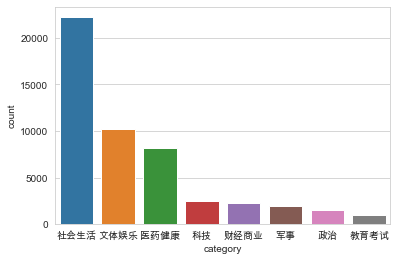

In [80]:
sns.barplot(x=count1['category'], y=count1['count'],)

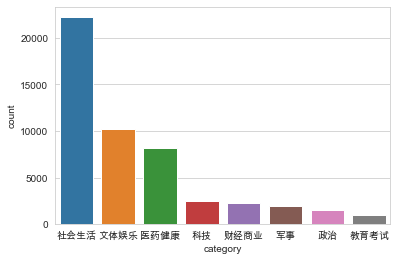

In [81]:
g = sns.barplot(data=count1,x='category',y='count')

In [82]:
text = ' '.join(data['content'].tolist())

In [83]:
w = wordcloud.WordCloud(font_path="../../simhei.ttf",height=1980,width=1280,margin=2).generate(text)

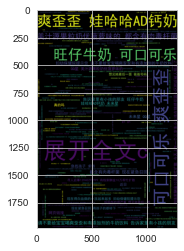

In [84]:
plt.imshow(w)

In [85]:
from collections import Counter

In [86]:
textlist = list(jieba.cut(text))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/zq/d0jljc5s673d13cx7fkr0w_w0000gp/T/jieba.cache
Loading model cost 0.945 seconds.
Prefix dict has been built successfully.


In [93]:
text_tongji = Counter(textlist)

In [95]:
d = {key:value for (key,value) in text_tongji.most_common(100)}

In [96]:
d

{'，': 223552,
 '的': 119591,
 ' ': 95994,
 '。': 73718,
 '\t': 49224,
 '了': 47967,
 '！': 34226,
 '、': 33123,
 '#': 32540,
 '在': 29289,
 '是': 28452,
 '有': 23214,
 '：': 23024,
 '被': 20735,
 '@': 18757,
 '“': 16644,
 '都': 16339,
 '人': 16002,
 '”': 15981,
 '？': 14986,
 '【': 14950,
 '】': 14860,
 '我': 14457,
 '...': 13279,
 '和': 12082,
 '\u200b': 12063,
 '你': 11679,
 '月': 10989,
 '不': 10911,
 '日': 10697,
 '就': 9675,
 '中国': 9278,
 '…': 9219,
 '也': 9202,
 '上': 8965,
 '孩子': 8705,
 '（': 8244,
 '看': 8228,
 '/': 8221,
 '）': 8081,
 '多': 7998,
 '请': 7575,
 '《': 7179,
 '能': 7098,
 '》': 7082,
 ':': 7072,
 '他': 6890,
 '小女孩': 6864,
 '她': 6808,
 '从': 6608,
 '对': 6534,
 '说': 6490,
 '为': 6485,
 '2': 6303,
 '一下': 6194,
 '帮忙': 6082,
 '看到': 6067,
 '一个': 6014,
 '|': 6007,
 '我们': 6000,
 '到': 5867,
 ';': 5728,
 '走': 5687,
 '给': 5412,
 '信息': 5375,
 '急': 5245,
 '要': 5188,
 '.': 5157,
 '将': 5157,
 '这': 5081,
 '附近': 5020,
 '大家': 5009,
 '中': 4969,
 '1': 4961,
 '年': 4913,
 '3': 4894,
 '视频': 4856,
 '时': 4632,
 '没有': 4593

In [92]:
stopwords = ['，','的',' ','。','\t','了','!','%','@','#','"','”','？','：','有','是','被','在','都','人','【','】','...','我','\u200b','和','你','月','日','就','不','也','上','…','看','）','/','（','）']